<a href="https://colab.research.google.com/github/BridgetteJuma/AI-Coursework_2025/blob/main/Diamonds_Price_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#1.importing and uploading Diamonds dataset from Kaggle
from google.colab import files
uploaded = files.upload()

Saving diamonds.csv to diamonds.csv


In [4]:
import pandas as pd

diamonds = pd.read_csv('diamonds.csv')
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [11]:
diamonds.drop_duplicates()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [12]:
diamonds.columns
diamonds.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,50400.000000,50400.000000,50400.000000,50400.000000,50400.000000,50400.000000,50400.000000,50400.000000
mean,27054.875000,0.723657,61.755603,57.421873,3159.460833,5.582965,5.586255,3.448359
std,16102.688258,0.383757,1.430780,2.229414,2764.700316,0.994872,0.993937,0.630422
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,12600.750000,0.380000,61.100000,56.000000,911.000000,4.670000,4.680000,2.880000
50%,28740.500000,0.700000,61.800000,57.000000,2155.000000,5.590000,5.570000,3.430000
75%,41340.250000,1.010000,62.500000,59.000000,4669.000000,6.430000,6.420000,3.980000
max,53940.000000,3.650000,79.000000,79.000000,11883.000000,9.540000,31.800000,31.800000


In [13]:
#Checking structural Errors
diamonds['cut'].unique()
diamonds['color'].unique()
diamonds['clarity'].unique()

#Fixing Structural errors
diamonds['cut'] = diamonds['cut'].str.title()
diamonds['color'] = diamonds['color'].str.upper()
diamonds['clarity'] = diamonds['clarity'].str.upper()

In [14]:
#HANDLING MISSING DATA
# Check missing values
diamonds.isnull()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
53935,False,False,False,False,False,False,False,False,False,False,False
53936,False,False,False,False,False,False,False,False,False,False,False
53937,False,False,False,False,False,False,False,False,False,False,False
53938,False,False,False,False,False,False,False,False,False,False,False


In [15]:
# Dropping all rows with missing elements
diamonds.dropna()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [16]:
#Carrying out Explaratory Data Analysis
#Importing important libraries
import seaborn as sns
import matplotlib.pyplot as plt

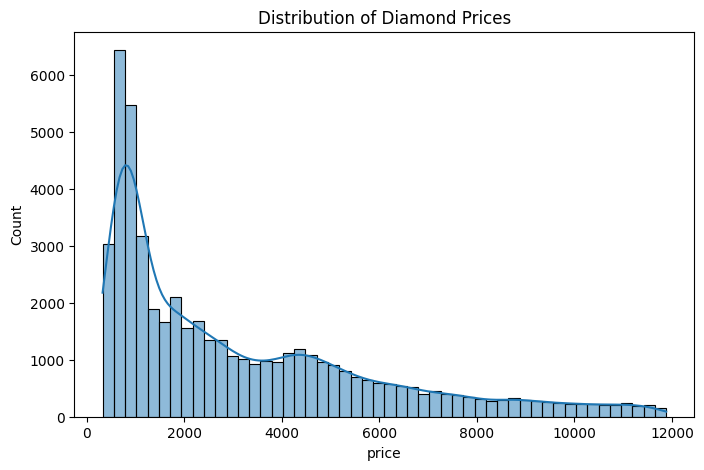

In [17]:
# 1. Distribution of diamond prices using a histogram
plt.figure(figsize=(8,5))
sns.histplot(diamonds['price'], bins=50, kde=True)
plt.title('Distribution of Diamond Prices')
plt.show()

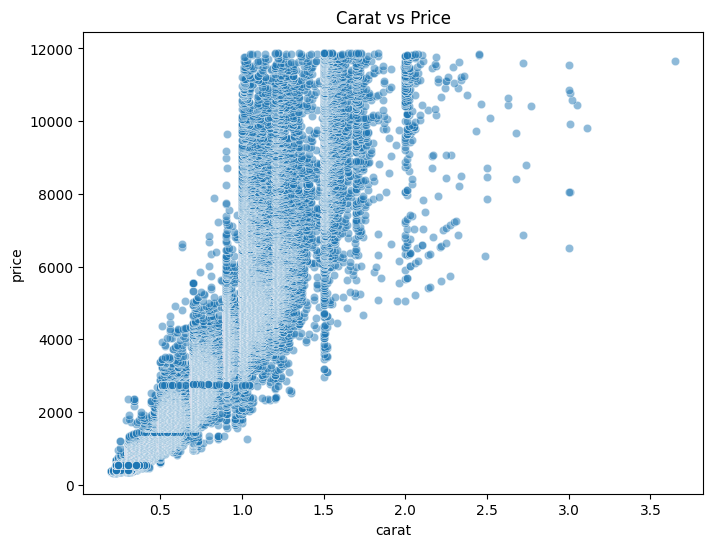

In [18]:
#Scatter plot betweeen carat and price
plt.figure(figsize=(8,6))
sns.scatterplot(x='carat', y='price', data=diamonds, alpha=0.5)
plt.title('Carat vs Price')
plt.show()

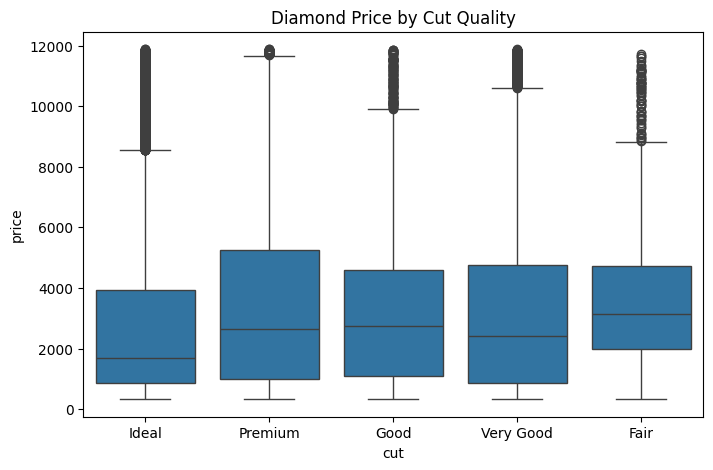

In [19]:
# 3. Relationship between cut and price using a boxplot
plt.figure(figsize=(8,5))
sns.boxplot(x='cut', y='price', data=diamonds)
plt.title('Diamond Price by Cut Quality')
plt.show()

Insights from Exploratory Data Analysis

1.Histogram

The diamonds in the dataset are mostly on the cheaper side and only a few are very expensive that means that high priced diamonds are rare.

2.Scatter plot

We have a strong relationship between carat and price where large diamonds generally cost more hence the relationship is positive because as the carat increases the price tends to rise.

3.Box Plot

The plot shows that diamond with premium and ideal cuts tend to be prices higher.

In [20]:
#Creating a sample with randomly selected 12500 records
diamonds_model = diamonds.sample(12500, random_state=42)
diamonds_model.shape

(12500, 11)

In [21]:
#Question 3
#converting the data into numbers
diamonds_encoded = pd.get_dummies(diamonds_model, drop_first=True)

#Defining input X and output Y
X = diamonds_encoded.drop('price', axis=1)
y = diamonds_encoded['price']

#Spliting into training and training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Creating and training the linear model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

#Predicting the diamond prices using the training model
y_pred = lr.predict(X_test)

#Evaluating the models performance
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

print("R2 score:", r2_score(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.9222504429579492
Root Mean Squared Error: 745.5847245725834


In [8]:
#que 4
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select continuous variables
numeric_features = ['carat', 'depth', 'table', 'x', 'y', 'z']

# Standardize data
scaler = StandardScaler()
scaled = scaler.fit_transform(diamonds_model[numeric_features])

# Apply PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled)

# Create DataFrame for the two components
pca_df = pd.DataFrame(pca_features, columns=['PC1', 'PC2'])
pca_df['price'] = diamonds_model['price'].values

# Split into train/test sets
X_pca = pca_df[['PC1', 'PC2']]
y_pca = pca_df['price']
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_pca, test_size=0.2, random_state=42)

# Fit Linear Regression on PCA data
pca_lr = LinearRegression()
pca_lr.fit(X_train_pca, y_train_pca)

# Predict and evaluate
y_pred_pca = pca_lr.predict(X_test_pca)
print("PCA Model R²:", r2_score(y_test_pca, y_pred_pca))
print("PCA Model RMSE:", np.sqrt(mean_squared_error(y_test_pca, y_pred_pca)))

PCA Model R²: 0.8125078266901086
PCA Model RMSE: 1157.816172571027


In [9]:
#que 5
from sklearn.linear_model import Lasso, Ridge

# Lasso Regression
lasso = Lasso(alpha=0.1, random_state=42)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

# Ridge Regression
ridge = Ridge(alpha=1.0, random_state=42)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# Evaluate both
r2_lasso = r2_score(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))

r2_ridge = r2_score(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

print("Lasso R²:", r2_lasso)
print("Lasso RMSE:", rmse_lasso)
print("Ridge R²:", r2_ridge)
print("Ridge RMSE:", rmse_ridge)


Lasso R²: 0.9219233650589652
Lasso RMSE: 747.1513466836702
Ridge R²: 0.9220899953001112
Ridge RMSE: 746.3536400093868


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.972e+09, tolerance: 7.399e+06
  model = cd_fast.enet_coordinate_descent(


In [10]:
#que 6
comparison = pd.DataFrame({
    'Model': ['Linear Regression (Full)', 'PCA Regression (2 Features)',
              'Lasso Regression', 'Ridge Regression'],
    'R² Score': [r2_score(y_test, y_pred), r2_score(y_test_pca, y_pred_pca),
                 r2_lasso, r2_ridge],
    'RMSE': [np.sqrt(mean_squared_error(y_test, y_pred)),
             np.sqrt(mean_squared_error(y_test_pca, y_pred_pca)),
             rmse_lasso,
             rmse_ridge]
})

print(comparison)

# Discussion:
print("""
Interpretation:
The full Linear Regression model generally achieves the highest R² because it
 uses all features.
The PCA-based model performs lower due to dimensionality reduction and loss of
information.
Lasso might slightly reduce R² if it drops less relevant features but helps
prevent overfitting.
Ridge usually maintains accuracy while reducing overfitting, often performing
best overall in generalization.
""")


                         Model  R² Score         RMSE
0     Linear Regression (Full)  0.922250   745.584725
1  PCA Regression (2 Features)  0.812508  1157.816173
2             Lasso Regression  0.921923   747.151347
3             Ridge Regression  0.922090   746.353640

Interpretation:
The full Linear Regression model generally achieves the highest R² because it
 uses all features.
The PCA-based model performs lower due to dimensionality reduction and loss of 
information.
Lasso might slightly reduce R² if it drops less relevant features but helps 
prevent overfitting.
Ridge usually maintains accuracy while reducing overfitting, often performing 
best overall in generalization.



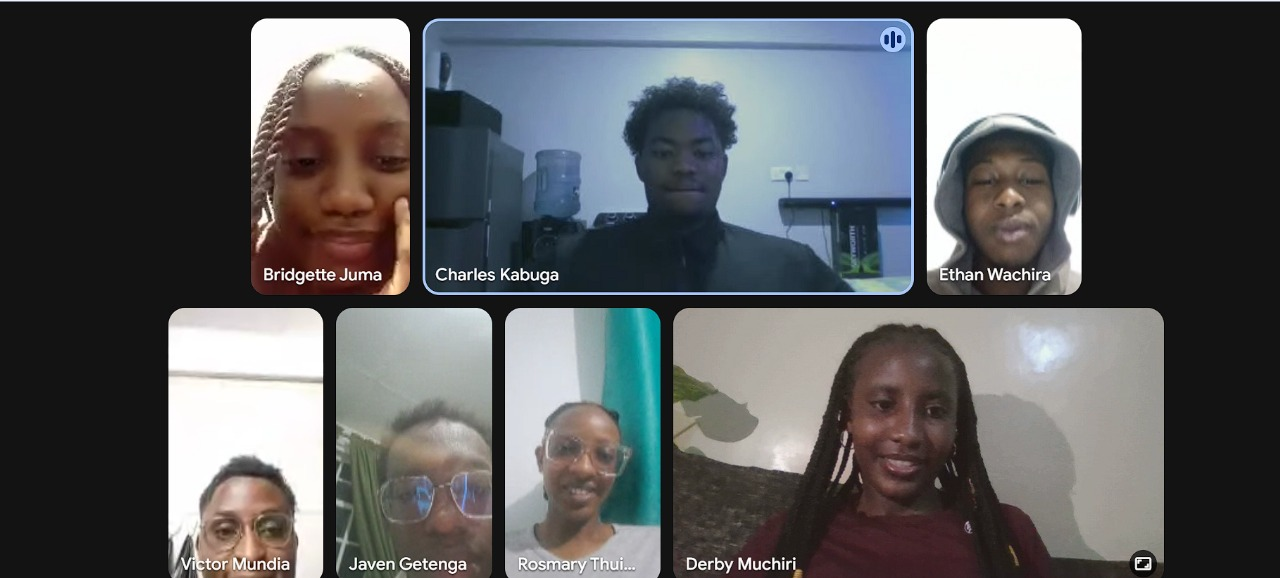